# 线性回归实验

在这个练习中，我们使用一个Kaggle竞赛中提供的共享单车的数据集：[Bike Sharing Demand](https://www.kaggle.com/c/bike-sharing-demand/data)。
该数据集包含2011到2012年Capital Bikeshare系统中记录的每日每小时单车的租赁数，以及相应的季节和气候等信息。

数据列：
* **datetime** - hourly date + timestamp  
* **season** -  1 = spring, 2 = summer, 3 = fall, 4 = winter 
* **holiday** - whether the day is considered a holiday
* **workingday** - whether the day is neither a weekend nor holiday
* **weather** - 1: Clear, Few clouds, Partly cloudy, Partly cloudy；2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist；3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds；4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog 
* **temp** - temperature in Celsius
* **atemp** - "feels like" temperature in Celsius
* **humidity** - relative humidity
* **windspeed** - wind speed
* **casual** - number of non-registered user rentals initiated
* **registered** - number of registered user rentals initiated
* **count** - number of total rentals

## 第一步：读入数据

In [63]:
# read the data and set the datetime as the index
import pandas as pd

bikes = pd.read_csv('e2.2_bikeshare.csv', index_col='datetime', parse_dates=True)

In [64]:
bikes.head()

season  holiday  workingday  weather  temp   atemp  \
datetime                                                                  
2011-01-01 00:00:00       1        0           0        1  9.84  14.395   
2011-01-01 01:00:00       1        0           0        1  9.02  13.635   
2011-01-01 02:00:00       1        0           0        1  9.02  13.635   
2011-01-01 03:00:00       1        0           0        1  9.84  14.395   
2011-01-01 04:00:00       1        0           0        1  9.84  14.395   

                     humidity  windspeed  casual  registered  count  
datetime                                                             
2011-01-01 00:00:00        81        0.0       3          13     16  
2011-01-01 01:00:00        80        0.0       8          32     40  
2011-01-01 02:00:00        80        0.0       5          27     32  
2011-01-01 03:00:00        75        0.0       3          10     13  
2011-01-01 04:00:00        75        0.0       0           1      1

## 第二步：可视化数据

* 用matplotlib画出温度“temp”和自行车租赁数“count”之间的散点图；
* 用seborn画出温度“temp”和自行车租赁数“count”之间带线性关系的散点图（提示：使用seaborn中的lmplot绘制）

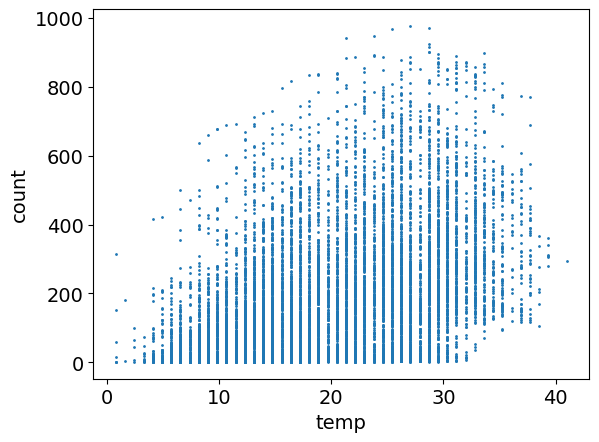

In [65]:
# matplotlib
#用matplotlib画出温度“temp”和自行车租赁数“count”之间的散点图
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.xlabel('temp')
plt.ylabel('count')
plt.scatter(bikes['temp'], bikes['count'],s=1)


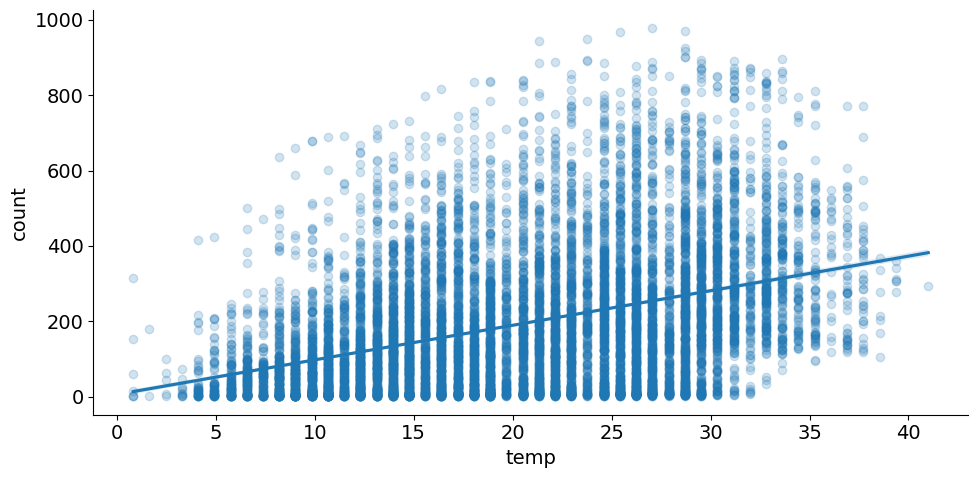

In [66]:
# seaborn
import seaborn as sns
sns.lmplot(x='temp', y='count', data=bikes, aspect=2, scatter_kws={'alpha':0.2})


## 第三步：一元线性回归

用温度预测自行车租赁数

In [67]:
# create X and y
X_train=bikes[['temp']]
Y_train=bikes['count']

In [68]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR=LR.fit(X_train,Y_train)
Y_pred=LR.predict(X_train)

In [69]:
# print the coefficients
print(Y_pred)

[ 96.2843313   88.7644881   88.7644881  ... 133.88354727 133.88354727
 126.36370408]


## 第四步：探索多个特征

In [70]:
# explore more features
feature_cols = ['temp', 'season', 'weather', 'humidity']

/home/ir/dev/justhomework/AIandML/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


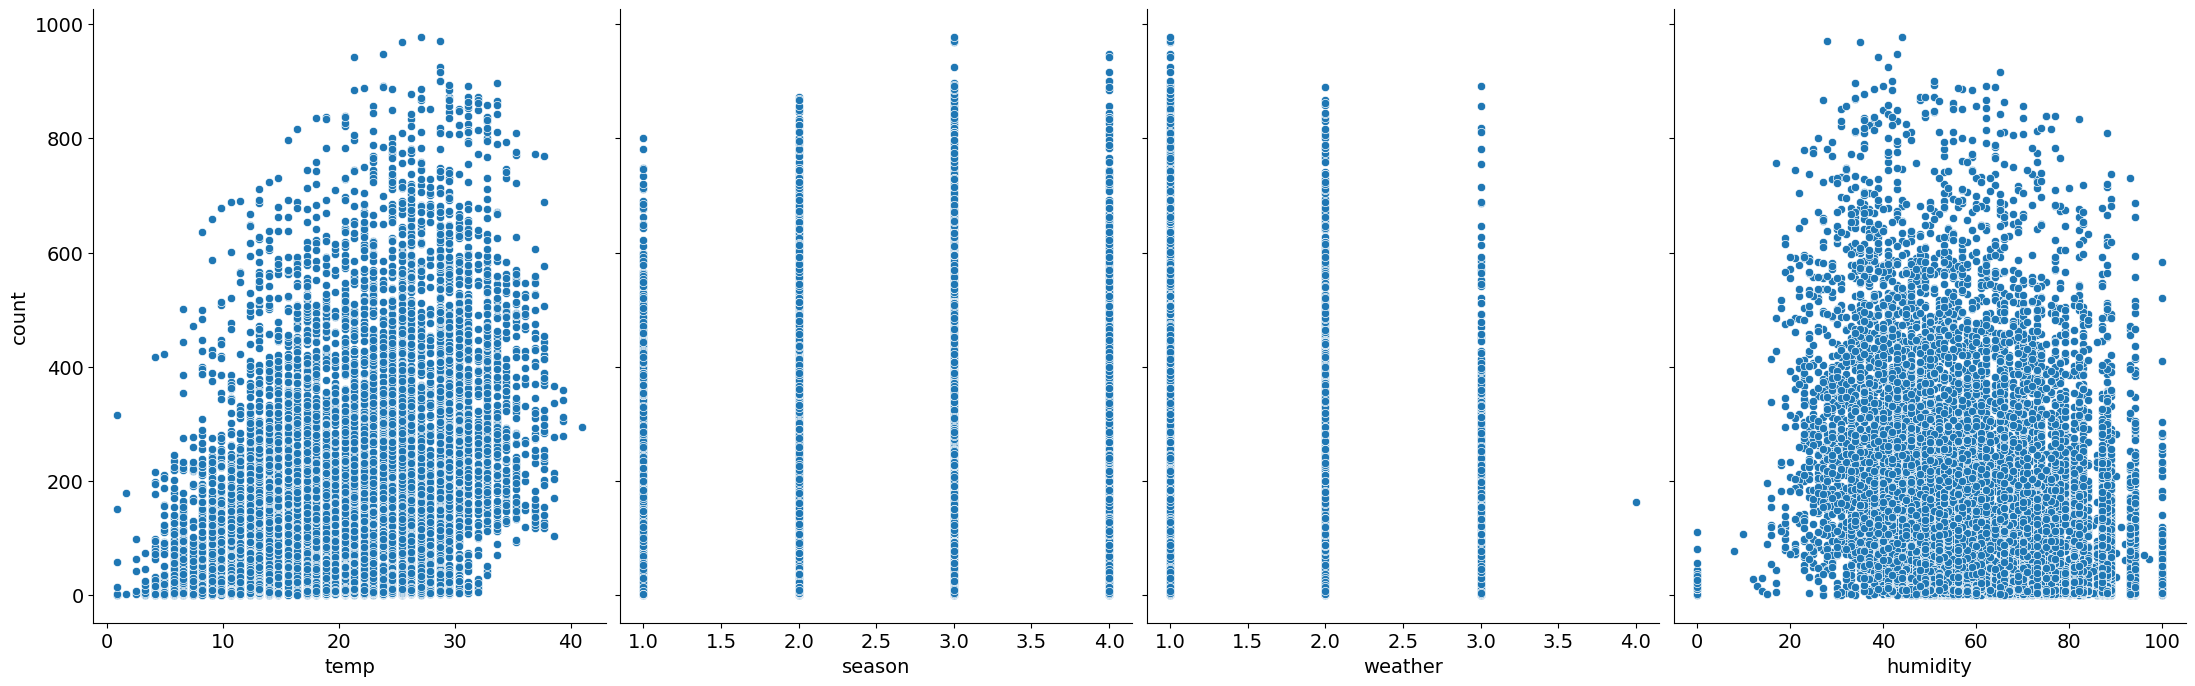

In [71]:
# using seaborn, draw multiple scatter plots between each feature in feature_cols and 'count'
sns.pairplot(bikes, x_vars=feature_cols, y_vars='count', size=7, aspect=0.8)

In [72]:
# correlation matrix (ranges from 1 to -1)
bikes.corr()

season   holiday  workingday   weather      temp     atemp  \
season      1.000000  0.029368   -0.008126  0.008879  0.258689  0.264744   
holiday     0.029368  1.000000   -0.250491 -0.007074  0.000295 -0.005215   
workingday -0.008126 -0.250491    1.000000  0.033772  0.029966  0.024660   
weather     0.008879 -0.007074    0.033772  1.000000 -0.055035 -0.055376   
temp        0.258689  0.000295    0.029966 -0.055035  1.000000  0.984948   
atemp       0.264744 -0.005215    0.024660 -0.055376  0.984948  1.000000   
humidity    0.190610  0.001929   -0.010880  0.406244 -0.064949 -0.043536   
windspeed  -0.147121  0.008409    0.013373  0.007261 -0.017852 -0.057473   
casual      0.096758  0.043799   -0.319111 -0.135918  0.467097  0.462067   
registered  0.164011 -0.020956    0.119460 -0.109340  0.318571  0.314635   
count       0.163439 -0.005393    0.011594 -0.128655  0.394454  0.389784   

            humidity  windspeed    casual  registered     count  
season      0.190610  -0.147121  0.096758    0.164011  0.163439  
holiday     0.001929   0.008409  0.043799   -0.020956 -0.005393  
workingday -0.010880   0.013373 -0.319111    0.119460  0.011594  
weather     0.406244   0.007261 -0.135918   -0.109340 -0.128655  
temp       -0.064949  -0.017852  0.467097    0.318571  0.394454  
atemp      -0.043536  -0.057473  0.462067    0.314635  0.389784  
humidity    1.000000  -0.318607 -0.348187   -0.265458 -0.317371  
windspeed  -0.318607   1.000000  0.092276    0.091052  0.101369  
casual     -0.348187   0.092276  1.000000    0.497250  0.690414  
registered -0.265458   0.091052  0.497250    1.000000  0.970948  
count      -0.317371   0.101369  0.690414    0.970948  1.000000

<AxesSubplot: >

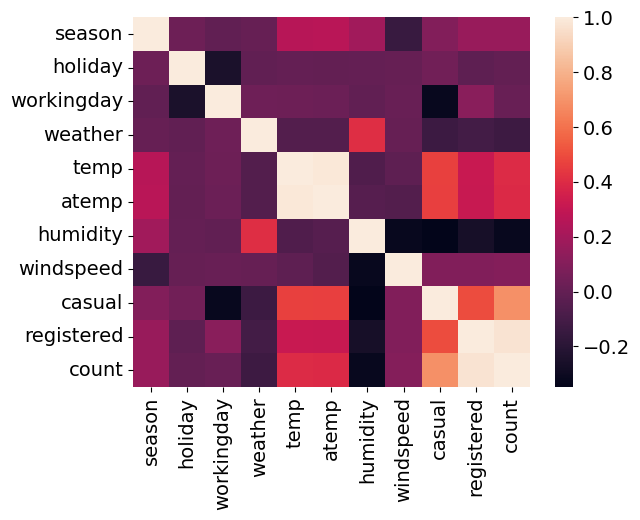

In [73]:
sns.heatmap(bikes.corr())

### 用'temp', 'season', 'weather', 'humidity'四个特征预测单车租赁数'count'

In [74]:
# create X and y
feature_cols = ['temp', 'season', 'weather', 'humidity']
X_train=bikes[feature_cols]
Y_train=bikes['count']

In [75]:
# import, instantiate, fit
from sklearn.linear_model import LinearRegression
LR=LinearRegression()
LR=LR.fit(X_train,Y_train)
Y_pred=LR.predict(X_train)

In [76]:
# print the coefficients
print(LR.intercept_)
print(LR.coef_)

159.5206878612979
[ 7.86482499 22.53875753  6.67030204 -3.11887338]


### 使用train/test split和RMSE来比较多个不同的模型

In [77]:
# compare different sets of features
feature_cols1 = ['temp', 'season', 'weather', 'humidity']
feature_cols2 = ['temp', 'season', 'weather']
feature_cols3 = ['temp', 'season', 'humidity']

X_train1=bikes[feature_cols1]
X_train2=bikes[feature_cols2]
X_train3=bikes[feature_cols3]
Y_train=bikes['count']

from sklearn.linear_model import LinearRegression
LR1=LinearRegression()
LR2=LinearRegression()
LR3=LinearRegression()
LR1=LR1.fit(X_train1,Y_train)
LR2=LR2.fit(X_train2,Y_train)
LR3=LR3.fit(X_train3,Y_train)
Y_pred1=LR1.predict(X_train1)
Y_pred2=LR2.predict(X_train2)
Y_pred3=LR3.predict(X_train3)

import numpy as np
from sklearn import metrics
print(np.sqrt(metrics.mean_squared_error(Y_train,Y_pred1)))
print(np.sqrt(metrics.mean_squared_error(Y_train,Y_pred2)))
print(np.sqrt(metrics.mean_squared_error(Y_train,Y_pred3)))


155.99832684186404
164.87950848896241
156.0458677100528


## 补充：处理类别特征

有两种类别特征：

- **有序类别值：** 转换成相应的数字值(例如: small=1, medium=2, large=3)
- **无序类别值:** 使用dummy encoding (0/1编码)

此数据集中的类别特征有：

- **有序类别值：** weather (已经被编码成相应的数字值1,2,3,4)
- **无序类别值：** season (需要进行dummy encoding), holiday (已经被dummy encoded), workingday (已经被dummy encoded)

In [78]:
# create dummy variables
season_dummies = pd.get_dummies(bikes.season, prefix='season')

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

season_1  season_2  season_3  season_4
datetime                                                   
2011-09-05 11:00:00         0         0         1         0
2012-03-18 04:00:00         1         0         0         0
2012-10-14 17:00:00         0         0         0         1
2011-04-04 15:00:00         0         1         0         0
2012-12-11 02:00:00         0         0         0         1

我们只需要 **三个 dummy 变量 (不是四个)** （为什么？）, 所以可以删除第一个dummy变量。

In [79]:
# drop the first column
season_dummies.drop(season_dummies.columns[0], axis=1, inplace=True)

# print 5 random rows
season_dummies.sample(n=5, random_state=1)

season_2  season_3  season_4
datetime                                         
2011-09-05 11:00:00         0         1         0
2012-03-18 04:00:00         0         0         0
2012-10-14 17:00:00         0         0         1
2011-04-04 15:00:00         1         0         0
2012-12-11 02:00:00         0         0         1

In [80]:
# concatenate the original DataFrame and the dummy DataFrame (axis=0 means rows, axis=1 means columns)
bikes = pd.concat([bikes, season_dummies], axis=1)

# print 5 random rows
bikes.sample(n=5, random_state=1)

season  holiday  workingday  weather   temp   atemp  \
datetime                                                                   
2011-09-05 11:00:00       3        1           0        2  28.70  33.335   
2012-03-18 04:00:00       1        0           0        2  17.22  21.210   
2012-10-14 17:00:00       4        0           0        1  26.24  31.060   
2011-04-04 15:00:00       2        0           1        1  31.16  33.335   
2012-12-11 02:00:00       4        0           1        2  16.40  20.455   

                     humidity  windspeed  casual  registered  count  season_2  \
datetime                                                                        
2011-09-05 11:00:00        74    11.0014     101         207    308         0   
2012-03-18 04:00:00        94    11.0014       6           8     14         0   
2012-10-14 17:00:00        44    12.9980     193         346    539         0   
2011-04-04 15:00:00        23    36.9974      47          96    143         1   
2012-12-11 02:00:00        66    22.0028       0           1      1         0   

                     season_3  season_4  
datetime                                 
2011-09-05 11:00:00         1         0  
2012-03-18 04:00:00         0         0  
2012-10-14 17:00:00         0         1  
2011-04-04 15:00:00         0         0  
2012-12-11 02:00:00         0         1

### 将编码成的dummy变量加入回归模型的特征，预测单车租赁数

In [81]:
# include dummy variables for season in the model
feature_cols = ['temp', 'season_2', 'season_3', 'season_4', 'humidity']
X_train=bikes[feature_cols]
Y_train=bikes['count']
LR=LinearRegression()
LR=LR.fit(X_train,Y_train)
Y_pred=LR.predict(X_train)
print(LR.intercept_)
print(LR.coef_)
print(np.sqrt(metrics.mean_squared_error(Y_train,Y_pred)))

134.90282635847132
[ 11.18640586  -3.3905431  -41.73686071  64.41596147  -2.81948164]
154.31453057695444


和前面的模型进行比较